# Movie Revenue Prediction 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [26]:
df=pd.read_csv(r'C:\Users\iamab\Documents\Jupyter Notebook\Admission Prediction\Admission_Predict_Ver1.1.csv')

In [27]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [18]:
df.shape

(500, 9)

In [19]:
df.drop(['Serial No.'], axis=1, inplace=True)

In [20]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

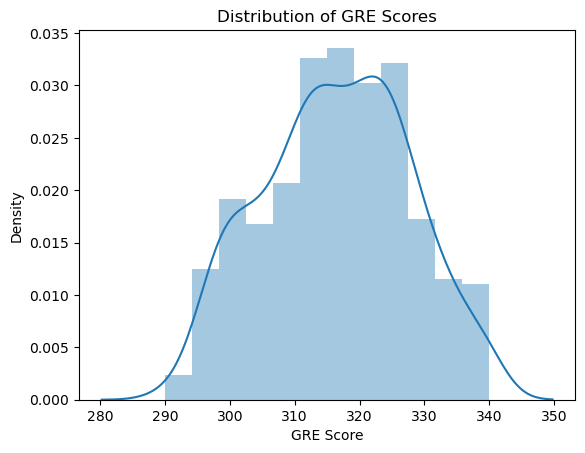

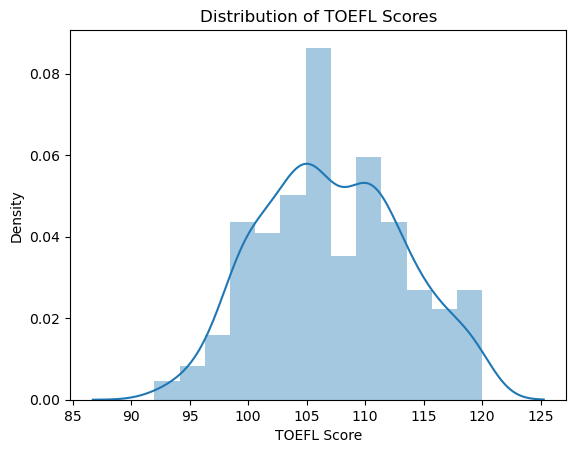

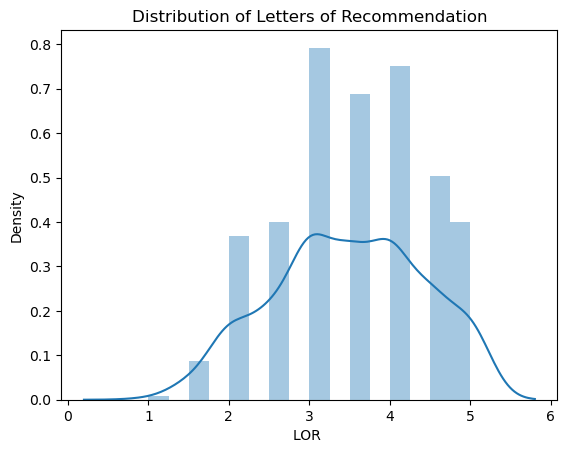

In [35]:
fig = sns.distplot(df['GRE Score'])
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'])
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['LOR '])
plt.title("Distribution of Letters of Recommendation")
plt.show()

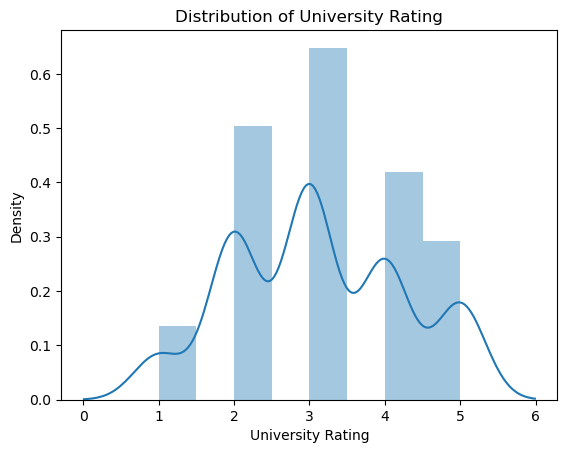

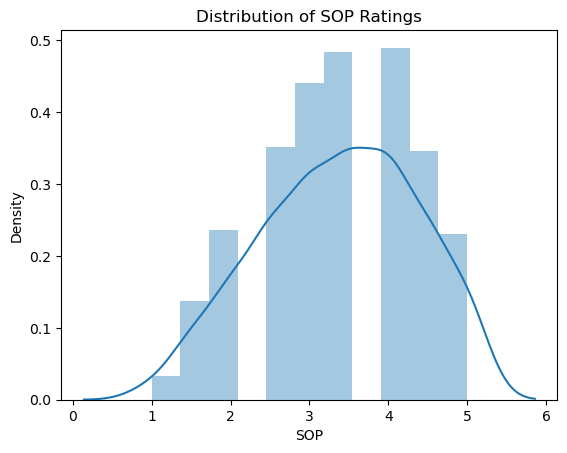

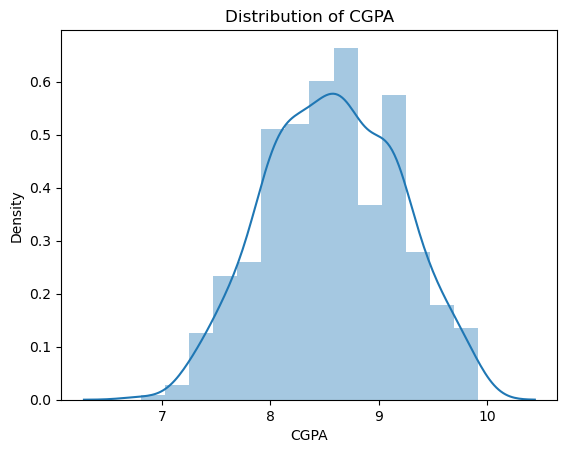

In [33]:
fig = sns.distplot(df['University Rating'])
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'])
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'])
plt.title("Distribution of CGPA")
plt.show()

<Axes: >

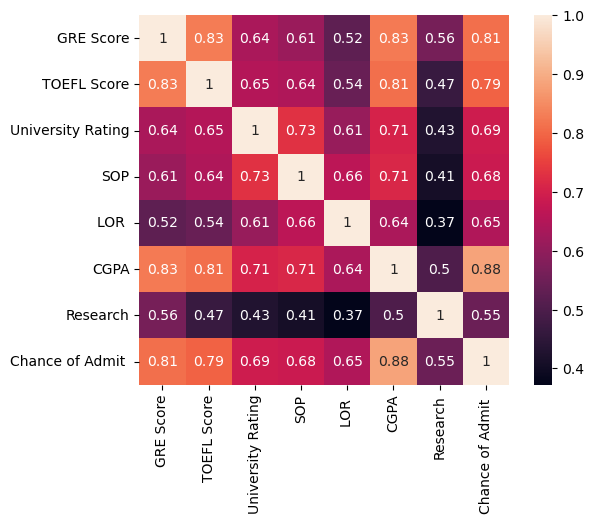

In [11]:
sns.heatmap(df.corr(),annot=True, square=True)

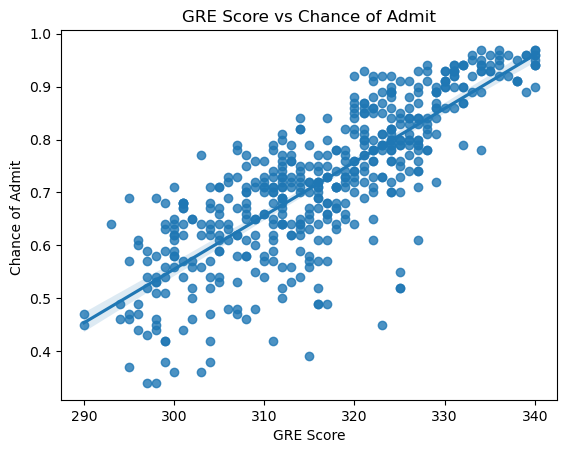

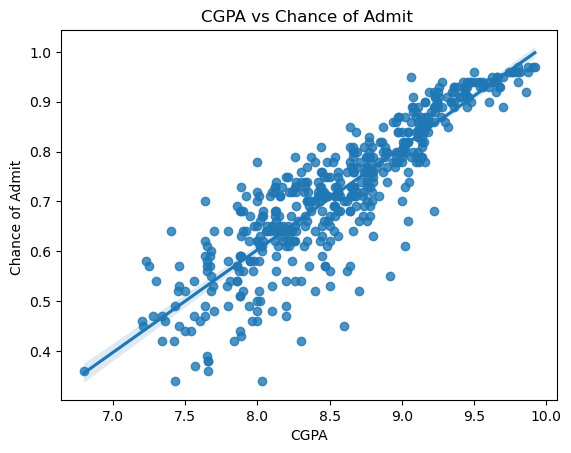

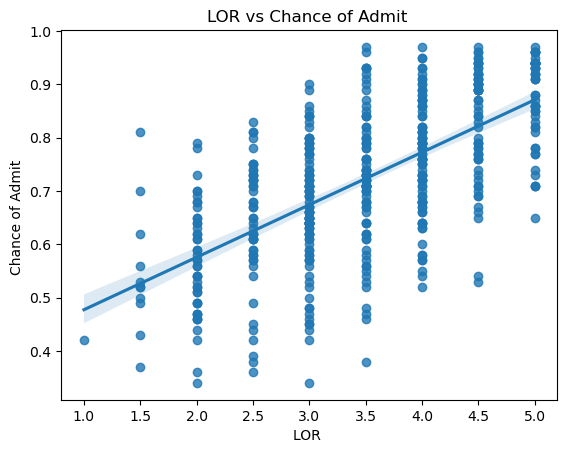

In [36]:
fig = sns.regplot(x="GRE Score", y="Chance of Admit ", data=df)
plt.title("GRE Score vs Chance of Admit")
plt.show()
fig = sns.regplot(x="CGPA", y="Chance of Admit ", data=df)
plt.title("CGPA vs Chance of Admit ")
plt.show()
fig = sns.regplot(x="LOR ", y="Chance of Admit ", data=df)
plt.title("LOR vs Chance of Admit ")
plt.show()

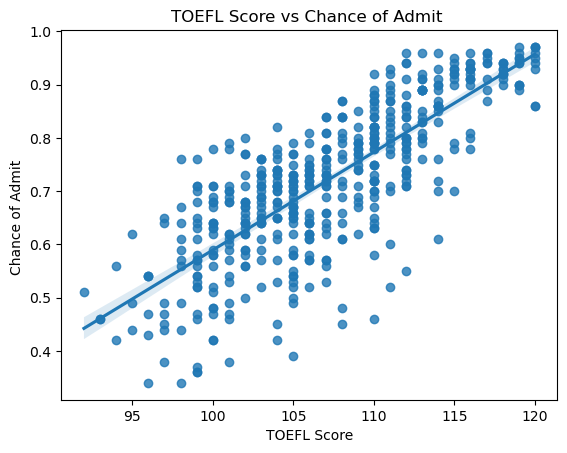

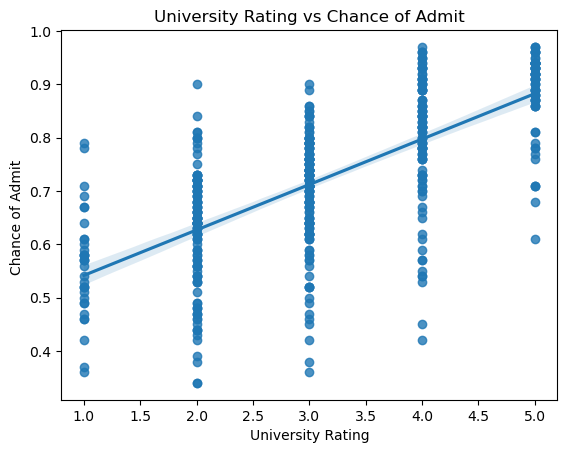

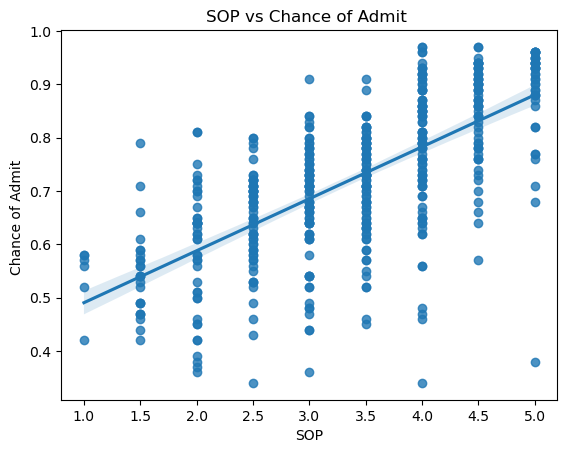

In [34]:
fig = sns.regplot(x="TOEFL Score", y="Chance of Admit ", data=df)
plt.title("TOEFL Score vs Chance of Admit ")
plt.show()
fig = sns.regplot(x="University Rating", y="Chance of Admit ", data=df)
plt.title("University Rating vs Chance of Admit")
plt.show()
fig = sns.regplot(x="SOP", y="Chance of Admit ", data=df)
plt.title("SOP vs Chance of Admit ")
plt.show()

In [ ]:
df.head()

In [ ]:
features=df.drop(['Chance of Admit '], axis=1)
target = df['Chance of Admit ']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.20,random_state=1)

In [ ]:
def model_performance(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    rmse=np.sqrt(mean_squared_error(true, predicted))
    r2=r2_score(true, predicted)
    return mae, rmse, r2

In [ ]:
linReg=LinearRegression()
linReg.fit(X_train,y_train)

In [ ]:
#Predict a value
y_lin_pred=linReg.predict(X_test)

In [ ]:
mae, rmse, r2= model_performance(y_test, y_lin_pred)
print ("Linear Regression Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

In [ ]:
y_test

In [ ]:
#predict a value
linReg.predict(X_test.iloc[0].values.reshape(1,7))

In [ ]:
plt.scatter(y_test,y_lin_pred , c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-', label='bestfitline')
plt.legend()

## polynomial regression

In [ ]:
pol_scores=[]
for i in range(2,8):
    pol=PolynomialFeatures(degree=i)
    X_pol_train=pol.fit_transform(X_train)
    X_pol_test=pol.fit_transform(X_test)
    linReg.fit(X_pol_train, y_train)
    pol_scores.append(linReg.score(X_pol_test, y_test))
plt.plot(range(2,8), pol_scores)

In [ ]:
pol=PolynomialFeatures(degree=2)
X_pol_train=pol.fit_transform(X_train)
X_pol_test=pol.fit_transform(X_test)

In [ ]:
linReg.fit(X_pol_train, y_train)

In [ ]:
y_pol_pred=linReg.predict(X_pol_test)

In [ ]:
mae, rmse, r2= model_performance(y_test, y_pol_pred)
print ("Polynomial Regression Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

In [ ]:
#predict a value
linReg.predict(X_pol_test[0].reshape(1,36))

In [ ]:
plt.scatter(y_test,y_pol_pred , c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-', label='bestfitline')
plt.legend()

## scaling for knn

In [ ]:
scaler=StandardScaler()
X_knn_train=scaler.fit_transform(X_train)
X_knn_test=scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_scores=[]
for i in range(1,50):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_knn_train, y_train)
    knn_scores.append(knn.score(X_knn_test, y_test))
plt.plot(range(1,50), knn_scores)

In [ ]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(X_knn_train, y_train)

In [ ]:
y_knn_pred=knn.predict(X_knn_test)

In [ ]:
mae, rmse, r2= model_performance(y_test, y_knn_pred)
print ("K-Nearest Neighbours Regressor Performance: \n")
print("RMSE: ",rmse)
print("MAE: ",mae)
print("R2 Score: ",r2*100)

In [ ]:
#Predict a value
knn.predict(X_knn_test[0].reshape(1,7))

In [ ]:
plt.scatter(y_test, y_knn_pred, c='red', label='Actual')
plt.scatter(y_test, y_test, c='blue', label='Predicted')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='black', linestyle='-', label='bestfitline')
plt.legend()